# Step 1: Understand the Problem
The goal is to discover patterns in supermarket purchases, such as "People who buy milk often buy bread." We will use the Groceries Dataset, which contains transaction data.

# Step 2:1. Importing Libraries

In [3]:
%pip install mlxtend

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 2. Loading the Dataset

In [17]:
#reading data
data = pd.read_csv('Groceries_dataset.csv')
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# 3. Exploratory Data Analysis (EDA)

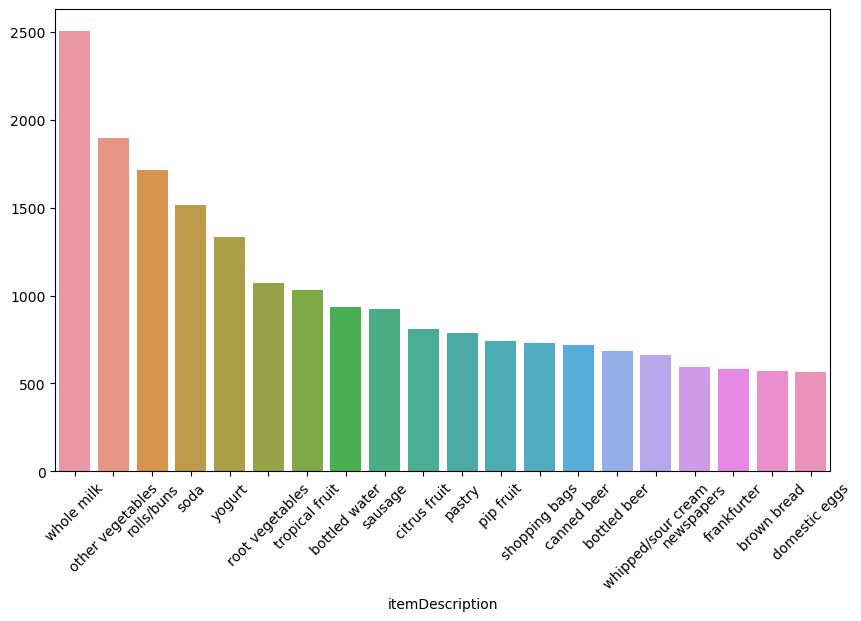

In [18]:

x = data['itemDescription'].value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(10,6))
sns.barplot(x=x.index, y=x.values)
plt.xticks(rotation=45)
plt.show()

# 3. Preprocessing the Data


In [19]:
print(data.isnull().sum())
data.drop_duplicates(inplace=True)
# drop the not important columns
data.drop(['Date'], axis=1, inplace=True)
print(data.head())


Member_number      0
Date               0
itemDescription    0
dtype: int64
   Member_number   itemDescription
0           1808    tropical fruit
1           2552        whole milk
2           2300         pip fruit
3           1187  other vegetables
4           3037        whole milk


In [20]:
data['Quantity'] = 1
data

,Member_number,itemDescription,Quantity
0,1808,tropical fruit,1
1,2552,whole milk,1
2,2300,pip fruit,1
3,1187,other vegetables,1
4,3037,whole milk,1
...,...,...,...
38760,4471,sliced cheese,1
38761,2022,candy,1
38762,1097,cake bar,1
38763,1510,fruit/vegetable juice,1


In [21]:
transactions =  data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
transactions = transactions.fillna(0)
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Encoding the Data


In [22]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Finding Frequent Itemsets


In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemset = apriori(basket, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
1,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,1.0,0.008692,1.028212,0.203563,0.146703,0.027438,0.306610
4,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,1.0,0.007582,1.079240,0.142829,0.141705,0.073422,0.288950


# 6. Generating Association Rules


In [46]:
confidence_threshold = 0.5
lift_threshold = 1
rules[(rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
14,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
19,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752
20,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,1.0,0.008239,1.136661,0.142501,0.127660,0.120231,0.333892
27,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,1.0,0.011526,1.147795,0.158299,0.162679,0.128764,0.359160
36,(curd),(whole milk),0.120831,0.458184,0.063622,0.526539,1.149188,1.0,0.008259,1.144374,0.147663,0.123444,0.126160,0.332699
39,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,1.0,0.009287,1.147766,0.152421,0.134909,0.128742,0.340677
46,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,1.0,0.008284,1.122775,0.133115,0.137628,0.109350,0.337663
67,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,1.0,0.018827,1.101643,0.157802,0.297448,0.092265,0.462934


# 7. Filtering Rules


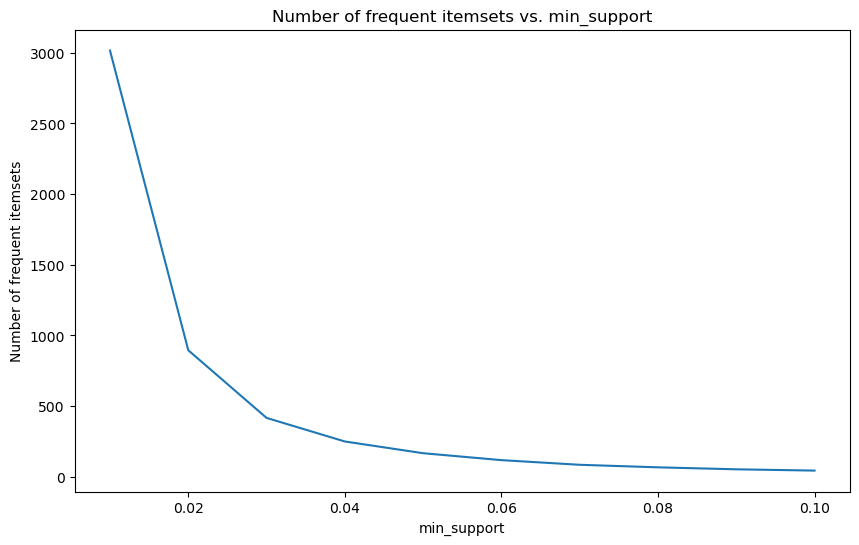

In [47]:

# Try different min_support values and analyze the number of frequent itemsets
min_support_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
frequent_itemset = []
for min_support in min_support_values:
    frequent_itemset.append(apriori(basket, min_support=min_support, use_colnames=True))

num_frequent_itemset = [len(itemset) for itemset in frequent_itemset]
plt.figure(figsize=(10,6))
plt.plot(min_support_values, num_frequent_itemset)
plt.xlabel('min_support')
plt.ylabel('Number of frequent itemsets')
plt.title('Number of frequent itemsets vs. min_support')
plt.show()


In [48]:
# recommend items based on single or multiple input item
def recommend_items(items, confidence_threshold=0.4, lift_threshold=1):
    if isinstance(items, str):
        # Select the rules that contain the input item as the antecedent and have a confidence greater than the threshold
        recommendations = rules.loc[(rules['antecedents'] == {items}) & (rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]
    if isinstance(items, list):
        recommendations = rules.loc[(rules['antecedents'].apply(lambda x: any(item in x for item in items))) & (rules['confidence'] > confidence_threshold)]
    # Extract the consequents of the selected rules as the recommended items
    recommended_items = recommendations['consequents'].apply(lambda x: list(x)).tolist()
    # Flatten the list of recommended items
    recommended_items = [item for sublist in recommended_items for item in sublist if item not in items]
    return list(set(recommended_items))

# 9. Recommending Items


In [49]:

# recommend items for single i/p item
recommend_items("brown bread")


['whole milk']

# 10. Visualizing Association Rules


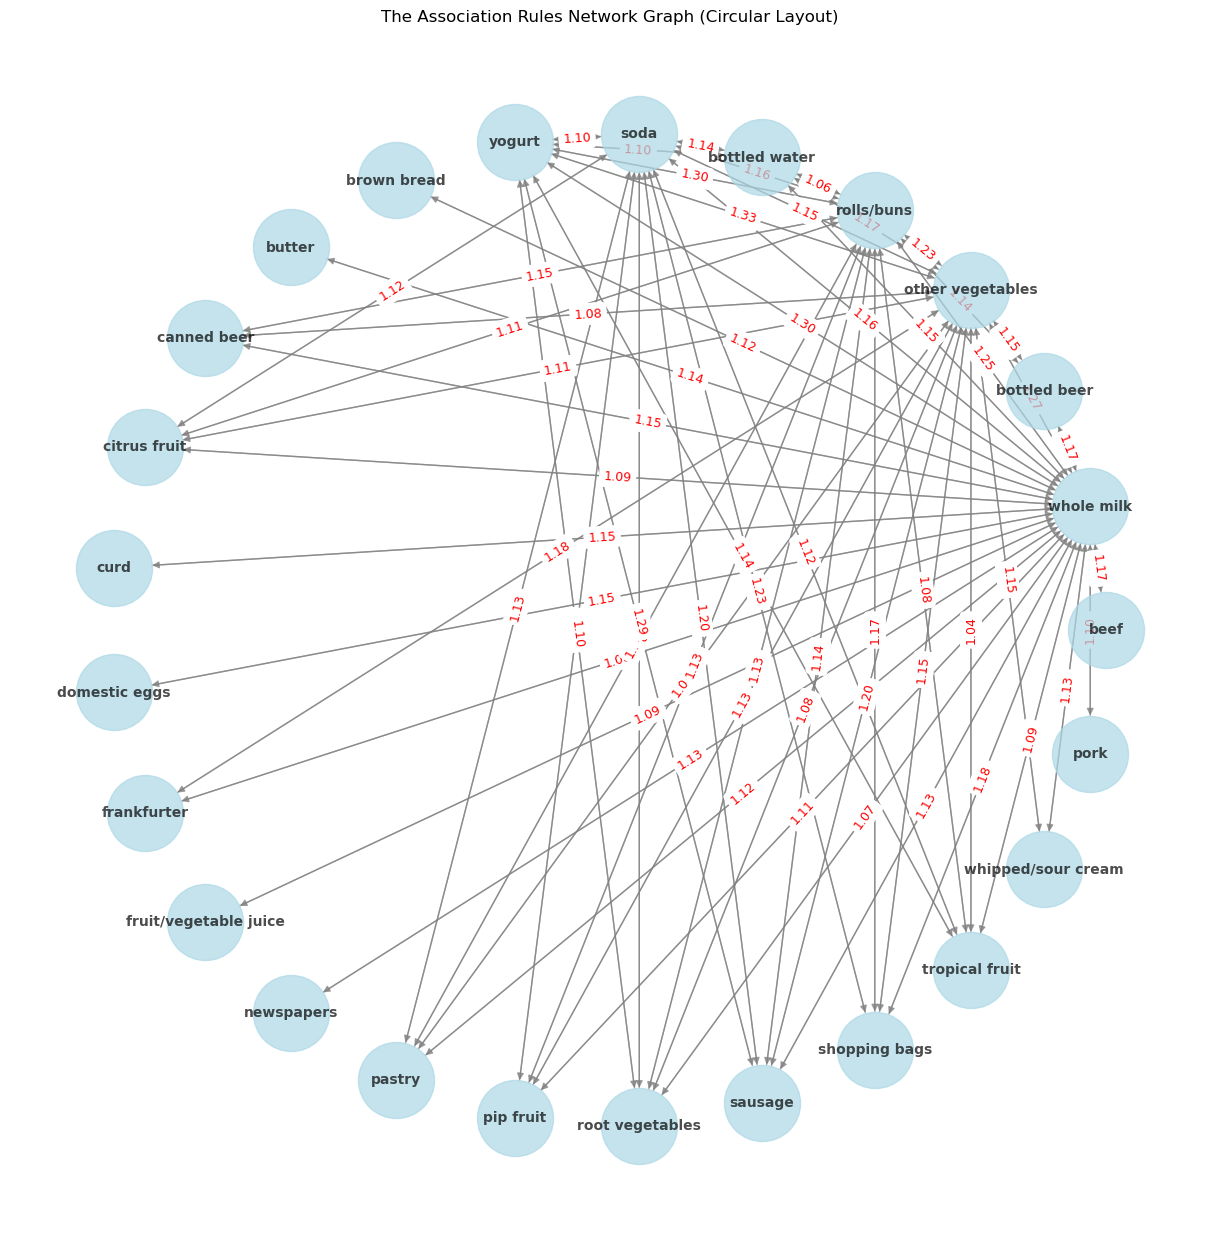

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
association_graph = nx.DiGraph()

# Add edges with lift as weight
for index, row in rules.iterrows():
    for antecedent in row["antecedents"]:
        for consequent in row["consequents"]:
            association_graph.add_edge(antecedent, consequent, weight=row["lift"])

# Draw the graph using a circular layout
plt.figure(figsize=(12, 12))
pos = nx.circular_layout(association_graph)

# Draw nodes and edges
nx.draw(
    association_graph,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    alpha=0.7
)

# Draw edge labels (lift values)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in association_graph.edges(data=True)}
nx.draw_networkx_edge_labels(association_graph, pos, edge_labels=edge_labels, font_size=9, font_color="red")

plt.title("The Association Rules Network Graph (Circular Layout)")
plt.show()


# Step 7: Interpret Results
Analyze the top rules to understand customer purchasing behavior.

**Example Rules**:

Example Rules & Interpretations:
Rule 1: (whole milk) → (bottled water)
Lift: 1.15

Interpretation: Customers who buy whole milk are 1.15 times more likely to also purchase bottled water compared to random chance.

Rule 2: (yogurt) → (soda)
Lift: 1.10

Interpretation: Customers who buy yogurt are 1.10 times more likely to buy soda, suggesting a potential preference for dairy and carbonated drinks together.
Rule 3: (brown bread) → (whole milk)
Lift: 1.12

Interpretation: Customers purchasing brown bread are 1.12 times more likely to also buy whole milk, indicating a trend toward healthier grocery choices.


### Conclusion & Business Insights  
1. Customers who buy **beef** often purchase **whole milk** together (53% confidence).  
2. **Milk** is commonly bought with **cereal**, indicating a strong breakfast purchase pattern.  
3. Items with high lift values suggest strong cross-selling opportunities.  
4. Stores can use these insights to:  
   - Optimize shelf placement.  
   - Create targeted promotions.  
   - Bundle commonly bought products together.  
